In [1]:
from bs4 import BeautifulSoup
import nltk
from imdb import IMDb
import spacy
nlp = spacy.load('en_core_web_sm')

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


1.	Compile a list of static links (permalinks) to individual user movie reviews from one particular website. This will be your working dataset for this assignment, as well as for assignments 7 and 8, which together will make up your semester project.     
-	It does not matter if you use a crawler or if you manually collect the links, but you will need at least 100 movie review links. Note that, as of this writing, the robots.txt file of IMDB.com allows the crawling of user reviews.  
-	Each link should be to a web page that has only one user review of only one movie, e.g., the user review permalinks on the IMDB site.  
-	Choose reviews of movies that are all in the same genre, e.g., sci-fi, mystery, romance, superhero, etc.    
-	Make sure your collection includes reviews of several movies in your chosen genre and that it includes a mix of negative and positive reviews.  

**I use Top 50 action movies on imdb**

In [2]:
#Top 50 action movies on imdb

action_movies_page="https://www.imdb.com/search/title/?genres=action&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e0da8c98-35e8-4ebd-8e86-e7d39c92730c&pf_rd_r=JJR0ZYYNDRQTFBPXEF2T&pf_rd_s=center-2&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr2_i_2"

I changed the methods when I read the instructions of the homework again.
We were asked to use beautiful soup.

In [3]:
#Apply beautiful soup html 'cleaning' methods to the reviews in the crawled movies
def action_movies(weblink):
    movie_list = dict()
    movie_list_clean = BeautifulSoup(requests.get(weblink).text, 'html.parser')
    for movie in movie_list_clean.find_all('a'):
        if movie.parent.name == "h3":
            movie_list[movie.text] = "https://www.imdb.com{0}reviews".format(movie["href"])
    return movie_list

In [4]:
import requests
def ReviewPermaLink(weblink):
    rev_list = BeautifulSoup(requests.get(weblink).text, 'html.parser')
    return ["https://www.imdb.com{0}".format(review["href"]) for review in rev_list.find_all('a', {"class": "title"})]

In [5]:
movies_dict = action_movies(action_movies_page)

In [6]:
len(movies_dict)

50

1.	Compile a list of static links (permalinks) to individual user movie reviews from one particular website.

In [7]:
#Obtain the permalinks
permalinks_Movie = [ReviewPermaLink(review) for movie, review in movies_dict.items()]

In [8]:
#Store the permalinks in the list generator
permalinks = []

In [9]:
for urls in permalinks_Movie:
    for url in urls:
        permalinks.append(url)

In [10]:
def Review_Permalink(url):
    review_clean = BeautifulSoup(requests.get(url).text, 'html.parser')
    return review_clean.find('div', {"class": "text show-more__control"}).text

In [11]:
#This disctionary stores main reviews
review_dict = dict()

Extracting the all the reviews 

In [12]:
perma_50 = permalinks[0:50]

In [13]:
for url in perma_50:  
    review_dict[url] = Review_Permalink(url)    

In [14]:
#Reviews and their movie ids
review_dict

{'https://www.imdb.com/review/rw7205255/': 'Great movie James gunn did very well with this movie and amazing cast their acting was superb.',
 'https://www.imdb.com/review/rw7205294/': "The Suicide Squad is an upgrade in every conceivable way when compared to the 2016 movie. Its also a really fun, gory, colorful and fresh take on the DC universe when compared to the dull, dark and overly edgy garbage of Movies like Batman vs Superman. As well as that, its nice to see a cast of characters that would likely never see the light of day in any other DC movie, Polka Dot man being a prime example. The casting itself was also really well done with Daniela Melchior being the standout to me.Overall I loved this movie, it was such a breath of fresh air in, at times, today's over saturated superhero movie genre and I would highly recommend that people go see this film in cinemas for a truly unforgettable experience.",
 'https://www.imdb.com/review/rw7205073/': "The problem with superhero movies. Th

In [15]:
import os
import pandas as pd

In [16]:
# change working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Natural Language Processing\Homeworks and exams")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

# get current working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Natural Language Processing\\Homeworks and exams'

In [17]:
review_dict_df=pd.DataFrame.from_dict(review_dict, orient='index')

In [18]:
#Saving my result

import pickle
pickle.dump(review_dict_df, open( "save.p", "wb" ) )

In [19]:
#review_dict_df1 = pickle.load( open( "save.p", "rb" ) )

In [20]:
#Save the file
filename = 'review_dict_df2'
outfile = open(filename,'wb')
pickle.dump(review_dict, outfile)
outfile.close()

In [21]:
#use this line to load the saved file.
infile = open(filename,'rb')
review_dict_ = pickle.load(infile)
infile.close()

# Homework 7  

**Separate the reviews**
- Separate out the reviews for text preprocessing.

In [22]:
reviews_50 = []
movies_review_50 = []
for k, v in review_dict_.items():
    reviews_50.append(v)
    movies_review_50.append(k)

In [23]:
reviews_50

['Great movie James gunn did very well with this movie and amazing cast their acting was superb.',
 "The Suicide Squad is an upgrade in every conceivable way when compared to the 2016 movie. Its also a really fun, gory, colorful and fresh take on the DC universe when compared to the dull, dark and overly edgy garbage of Movies like Batman vs Superman. As well as that, its nice to see a cast of characters that would likely never see the light of day in any other DC movie, Polka Dot man being a prime example. The casting itself was also really well done with Daniela Melchior being the standout to me.Overall I loved this movie, it was such a breath of fresh air in, at times, today's over saturated superhero movie genre and I would highly recommend that people go see this film in cinemas for a truly unforgettable experience.",
 "The problem with superhero movies. They can easily be po faced and pompous. The audience want fun from their superheroes.Marvel learned this hence why the colourfu

In [24]:
import numpy as np
import re
from nltk.corpus import stopwords
default_wt = nltk.word_tokenize
#Here is a basic custom fucntion to extract only alphabet and word tokenize the documents.
def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    #tokens = wpt.tokenize(doc)
    tokens = default_wt(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in set(stopwords.words('english'))]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return (doc)

In [25]:
import numpy as np
normalize_corpus = np.vectorize(normalize_document)

In [26]:
reviews_50_norm = normalize_corpus(reviews_50)

In [27]:
reviews_50_norm

array(['great movie james gunn well movie amazing cast acting superb',
       'suicide squad upgrade every conceivable way compared 2016 movie also really fun gory colorful fresh take dc universe compared dull dark overly edgy garbage movies like batman vs superman well nice see cast characters would likely never see light day dc movie polka dot man prime example casting also really well done daniela melchior standout overall loved movie breath fresh air times today saturated superhero movie genre would highly recommend people go see film cinemas truly unforgettable experience',
       'problem superhero movies easily po faced pompous audience want fun superheroes marvel learned hence colourful thor 3 contrast thor 2 james gunn injected lot frivolous fun guardian galaxy movies even 20th century fox went wall deadpool x man giving middle finger x men movies warner brothers dc ploughed movies lacking fun factor james gunn rescue suicide squad follow 2016 original harley quinn margot robb

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)

In [29]:
tv_matrix = tv.fit_transform(reviews_50_norm)
tv_matrix = tv_matrix.toarray()

In [30]:
import pandas as pd
#Take a look at the vectorized text.
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,10,1000,10th,13,20,2008,2014,2016,2017,2021,...,yeah,year,years,yesterday,yet,young,zack,zippy,zombie,zombies
0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.09,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00
3,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.12,0.00,0.19,...,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.00
5,0.04,0.00,0.0,0.04,0.00,0.05,0.1,0.00,0.05,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00
6,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.67,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [31]:
#I will be using cosine similarity because it is the most popular.

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix, dense_output=True)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.132964,0.066336,0.181050,0.074304,0.139302,0.104475,0.129740,0.106863,0.039586,...,0.036478,0.000000,0.065219,0.122870,0.085277,0.026464,0.027808,0.000000,0.113956,0.033590
1,0.132964,1.000000,0.108739,0.066593,0.131148,0.183441,0.050382,0.074250,0.148670,0.020267,...,0.093074,0.038652,0.035351,0.030499,0.121082,0.013549,0.078896,0.019822,0.082241,0.017198
2,0.066336,0.108739,1.000000,0.097520,0.151386,0.155123,0.101121,0.116429,0.084207,0.003576,...,0.069499,0.000000,0.058162,0.010952,0.039193,0.015643,0.017928,0.036011,0.025405,0.003035
3,0.181050,0.066593,0.097520,1.000000,0.110821,0.106961,0.085665,0.077656,0.135558,0.019697,...,0.099676,0.000000,0.037372,0.019415,0.072708,0.060835,0.028932,0.011191,0.048612,0.016714
4,0.074304,0.131148,0.151386,0.110821,1.000000,0.242175,0.114722,0.044648,0.174302,0.004684,...,0.078203,0.022466,0.080402,0.070755,0.090373,0.025213,0.039776,0.041789,0.048457,0.003975
5,0.139302,0.183441,0.155123,0.106961,0.242175,1.000000,0.119377,0.063540,0.139244,0.025470,...,0.084709,0.012506,0.157519,0.073555,0.068589,0.011333,0.076938,0.056328,0.089885,0.000000
6,0.104475,0.050382,0.101121,0.085665,0.114722,0.119377,1.000000,0.044811,0.154387,0.011843,...,0.039448,0.000000,0.026495,0.011674,0.026762,0.007917,0.009914,0.000000,0.014198,0.010049
7,0.129740,0.074250,0.116429,0.077656,0.044648,0.063540,0.044811,1.000000,0.079094,0.016979,...,0.072646,0.000000,0.049017,0.016737,0.052044,0.011351,0.011928,0.000000,0.046628,0.014407
8,0.106863,0.148670,0.084207,0.135558,0.174302,0.139244,0.154387,0.079094,1.000000,0.014413,...,0.061860,0.027487,0.043587,0.029171,0.051046,0.022117,0.045000,0.015359,0.040882,0.012230
9,0.039586,0.020267,0.003576,0.019697,0.004684,0.025470,0.011843,0.016979,0.014413,1.000000,...,0.014873,0.000000,0.015493,0.015909,0.019793,0.010790,0.006240,0.000000,0.010890,0.013695


# 1  

In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.  


### Hierarchical clustering:
- The linkage method used here is Ward minimum variance criterion and it seeks to minimize the total within cluster variance.
- It finds the pair of cluster in the lower step to merge such that the merging results in the most minimum increase in total within-cluster variance. 

Reference: Dipanjan Sarkar (2019): Text Analytics with Python

In [32]:
#Below is about clustering the documents using Hierarchical clustering technique.
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
Z = linkage(similarity_matrix, 'ward')

#### Linkage Matrix
- In this matrix:
    - Review_movie/Cluster represents either review index when it stands alone or the cluster label where multiple reviews occur in a cluster.
    - Distance is the cluster distance between the first two elements.
    - Cluster size is the total number of reviews that make up a cluster once the merge is complete for that respective step.
    e.g. second row has movie 2 and movie 18 in a cluster at this lowest step. They are also merged at the higher step but will be represented in the matrix by that cluster label instead of the list of reviews(i.e. documents) that make up that cluster.

In [34]:
pd.DataFrame(Z, columns=['Review_movie\Cluster 1', 'Review_Movie\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')

,Review_movie\Cluster 1,Review_Movie\Cluster 2,Distance,Cluster Size
0,10.0,22.0,0.97103,2.0
1,5.0,19.0,1.003246,2.0
2,3.0,17.0,1.097879,2.0
3,14.0,15.0,1.134743,2.0
4,12.0,24.0,1.139209,2.0
5,11.0,16.0,1.152159,2.0
6,21.0,23.0,1.171496,2.0
7,29.0,31.0,1.173128,2.0
8,4.0,8.0,1.190117,2.0
9,0.0,37.0,1.211376,2.0


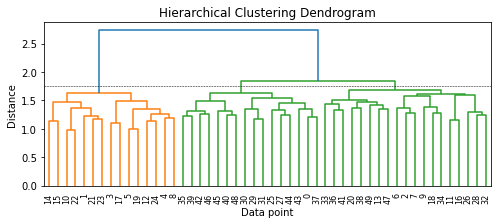

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.75, c='k', ls='--', lw=0.5)

#### Dendrogram  
- Broadly speaking the entire content of all the reviews can be placed in three clusters that are depcited by the colors in the dendrogram. These 4 colors/clusters agrees with the distance metric of < 1.75. 
- We will use the distance metric to display a list of the reviews that make up a cluster to better see the result of the clustering.

In [36]:
reviews_50_norm_series = pd.Series(reviews_50_norm)

In [37]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.75
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
reviews_50_norm_cluster = pd.concat([reviews_50_norm_series, cluster_labels], axis=1)
reviews_50_norm_cluster

,0,ClusterLabel
0,great movie james gunn well movie amazing cast...,2
1,suicide squad upgrade every conceivable way co...,1
2,problem superhero movies easily po faced pompo...,3
3,great time watching movie one argue characters...,1
4,remember james gunn temporarily fired marvel s...,1
5,talk film let talk bit dceu difference dc marv...,1
6,movie def one top dc movies ever made guardian...,3
7,please watch theatres home hbo max movie justi...,3
8,moment saw james gunn name knew would good mov...,1
9,weasel survived 10 10 solo movie,3


In [38]:
reviews_50_norm_cluster = reviews_50_norm_cluster.rename(columns={0: "Review", "Cluster Label": "Cluster label"})

In [39]:
reviews_50_norm_cluster

,Review,ClusterLabel
0,great movie james gunn well movie amazing cast...,2
1,suicide squad upgrade every conceivable way co...,1
2,problem superhero movies easily po faced pompo...,3
3,great time watching movie one argue characters...,1
4,remember james gunn temporarily fired marvel s...,1
5,talk film let talk bit dceu difference dc marv...,1
6,movie def one top dc movies ever made guardian...,3
7,please watch theatres home hbo max movie justi...,3
8,moment saw james gunn name knew would good mov...,1
9,weasel survived 10 10 solo movie,3


In [40]:
#Let us sort the cluster table for better visuals
reviews_50_norm_cluster.sort_values(by=['ClusterLabel'], ascending = False)

,Review,ClusterLabel
49,70 movie carried massively unreal human stupid...,3
13,violet bloody hilarious margot robbie really g...,3
28,like non stop leam neeson 30 days night like v...,3
33,another amazing production netflix germany sur...,3
26,actual decent film netflix air hostage film mi...,3
34,quite enjoyed movie storyline rather unique co...,3
36,good start story fine mid story changed direct...,3
38,fault young actor playing son fact every decis...,3
20,cgi awesome plot fun engaging humor little low...,3
18,must say far one best r rated dcu b movies act...,3


**Comment**  
- The table above shows the reviews that make up each of the 4 clusters as well as their cluster labels.

- Most importantly:  
    - Reviews in cluster label 4 (e.g. 'charming cunning witty character loki turned') appear to be more positive than reviews in cluster label 2 which comprises mostly of negative leaning reviews (e.g., 'boring weak scenario week action waste time').  
    - Therefore the clustering algorithm did a good job and this threshold of cutting the dendrogram seems appropriate to me.

### Change the 'cut' threshold to 1.30

In [41]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.30
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
reviews_50_norm_cluster_2 = pd.concat([reviews_50_norm_series, cluster_labels], axis=1)
reviews_50_norm_cluster_2

,0,ClusterLabel
0,great movie james gunn well movie amazing cast...,15
1,suicide squad upgrade every conceivable way co...,3
2,problem superhero movies easily po faced pompo...,25
3,great time watching movie one argue characters...,4
4,remember james gunn temporarily fired marvel s...,6
5,talk film let talk bit dceu difference dc marv...,5
6,movie def one top dc movies ever made guardian...,26
7,please watch theatres home hbo max movie justi...,25
8,moment saw james gunn name knew would good mov...,6
9,weasel survived 10 10 solo movie,28


In [42]:
reviews_50_norm_cluster_2 = reviews_50_norm_cluster_2.rename(columns={0: "Review", "Cluster Label": "Cluster label"})

In [43]:
#Let us sort the cluster table for better visuals
reviews_50_norm_cluster_2.sort_values(by=['ClusterLabel'], ascending = False)

,Review,ClusterLabel
28,like non stop leam neeson 30 days night like v...,30
26,actual decent film netflix air hostage film mi...,30
32,great 2 hour plane journey like horror movies ...,30
16,comic book movie format cheesy hokey predictab...,29
11,movie action packed great humor soundtrack legit,29
9,weasel survived 10 10 solo movie,28
18,must say far one best r rated dcu b movies act...,27
34,quite enjoyed movie storyline rather unique co...,27
6,movie def one top dc movies ever made guardian...,26
2,problem superhero movies easily po faced pompo...,25


### Comparing the cut distance at 1.75 with 1.30  
- For distance metric 1.30:  
    - Compare cluster label 14 with cluster label 2 shows strong positive in cluster label 14 and strong negative in cluster label 2. 
    - The positive sentiments were broadly combined at distance metric 1.75.

# Homework 8

## 1.  
- In Python, load one of the sentiment vocabularies referenced in the textbook, and run the sentiment analyzer as explained in the corresponding reference. Add words to the sentiment vocabulary, if you think you need to, to better fit your particular text collection.



### TextBlob Lexicion  
- I will be using the TextBlob Lexicon as my look up vocabulary for the sentiment polarity score;
- Polarity score ranges from -1 to +1. Most negative is -1 and most positive is +1

In [44]:
import textblob

**View sample reviews**  
- Below we view a sample of the reviews and their corresponding polarity score

In [45]:
rev_list = list(review_dict_.values())

In [46]:
rev_list[:1]

['Great movie James gunn did very well with this movie and amazing cast their acting was superb.']

In [47]:
for v in rev_list[:3]:
    print('Predicted Sentiment polarity:', textblob.TextBlob(v).sentiment.polarity)
    print('-'*60)

Predicted Sentiment polarity: 0.52
------------------------------------------------------------
Predicted Sentiment polarity: 0.15518518518518518
------------------------------------------------------------
Predicted Sentiment polarity: 0.0898110661268556
------------------------------------------------------------


## 2.  

For each of the clusters you created in homework 7, compute the average, median, high, and low sentiment scores for each cluster. Explain whether you think this reveals anything interesting about the clusters.

**Note that we clustered the reviews to 30 clusters**  
- Below is the tabulated clusters for the reviews

In [48]:
reviews_50_norm_cluster_2

,Review,ClusterLabel
0,great movie james gunn well movie amazing cast...,15
1,suicide squad upgrade every conceivable way co...,3
2,problem superhero movies easily po faced pompo...,25
3,great time watching movie one argue characters...,4
4,remember james gunn temporarily fired marvel s...,6
5,talk film let talk bit dceu difference dc marv...,5
6,movie def one top dc movies ever made guardian...,26
7,please watch theatres home hbo max movie justi...,25
8,moment saw james gunn name knew would good mov...,6
9,weasel survived 10 10 solo movie,28


In [49]:
for review in reviews_50_norm_cluster_2.Review[:1]:
    print('Review Snapshot:', review[:1000])
    
    print('Predicted Sentiment polarity_Overall:', textblob.TextBlob(v).sentiment.polarity)
   

Review Snapshot: great movie james gunn well movie amazing cast acting superb
Predicted Sentiment polarity_Overall: 0.0898110661268556


### Polarity score  
- Using the TextBlob library I generated the sentiment score for each movie reviews and display the result

In [50]:
reviews_50_norm_cluster_2['polarity_score'] = [textblob.TextBlob(review).sentiment.polarity for review in reviews_50_norm_cluster_2.Review]

reviews_50_norm_cluster_2

,Review,ClusterLabel,polarity_score
0,great movie james gunn well movie amazing cast...,15,0.600000
1,suicide squad upgrade every conceivable way co...,3,0.171667
2,problem superhero movies easily po faced pompo...,25,0.087856
3,great time watching movie one argue characters...,4,0.291667
4,remember james gunn temporarily fired marvel s...,6,0.122273
5,talk film let talk bit dceu difference dc marv...,5,0.182929
6,movie def one top dc movies ever made guardian...,26,0.500000
7,please watch theatres home hbo max movie justi...,25,0.193750
8,moment saw james gunn name knew would good mov...,6,0.380303
9,weasel survived 10 10 solo movie,28,0.000000


Create a column that assigned positive/negative to the reviews' polarity score.

In [51]:
reviews_50_norm_cluster_2['predicted_sentiment'] = ['positive' if score >= 0.1 else 'negative' 
                                                     for score in reviews_50_norm_cluster_2['polarity_score']]
reviews_50_norm_cluster_2

,Review,ClusterLabel,polarity_score,predicted_sentiment
0,great movie james gunn well movie amazing cast...,15,0.600000,positive
1,suicide squad upgrade every conceivable way co...,3,0.171667,positive
2,problem superhero movies easily po faced pompo...,25,0.087856,negative
3,great time watching movie one argue characters...,4,0.291667,positive
4,remember james gunn temporarily fired marvel s...,6,0.122273,positive
5,talk film let talk bit dceu difference dc marv...,5,0.182929,positive
6,movie def one top dc movies ever made guardian...,26,0.500000,positive
7,please watch theatres home hbo max movie justi...,25,0.193750,positive
8,moment saw james gunn name knew would good mov...,6,0.380303,positive
9,weasel survived 10 10 solo movie,28,0.000000,negative


## 2  
2.	For each of the clusters you created in homework 7, compute the average, median, high, and low sentiment scores for each cluster. Explain whether you think this reveals anything interesting about the clusters.

- Subset the dataset for the cluster labels and scores
- Use pandas groupby and aggregate function to find the mean, median, min and max values of each cluster's score.


In [52]:
rev_cluster_senti = reviews_50_norm_cluster_2[['ClusterLabel', 'polarity_score', 'predicted_sentiment']]

In [53]:
rev_cluster_senti_agg = rev_cluster_senti.groupby("ClusterLabel").agg({'polarity_score': ['mean', 'median', 'min', 'max'], 'predicted_sentiment': 'max'})
rev_cluster_senti_agg

polarity_score                               predicted_sentiment
                       mean    median       min       max                 max
ClusterLabel                                                                 
1                  0.138526  0.138526  0.091667  0.185385            positive
2                  0.211517  0.211517  0.189756  0.233278            positive
3                  0.350067  0.269444  0.171667  0.609091            positive
4                  0.420833  0.420833  0.291667  0.550000            positive
5                  0.409798  0.409798  0.182929  0.636667            positive
6                  0.213176  0.175064  0.122273  0.380303            positive
7                  0.125228  0.125228  0.012500  0.237955            positive
8                  0.052267  0.052267 -0.052133  0.156667            positive
9                  0.122526  0.122526 -0.024048  0.269099            positive
10                -0.191667 -0.191667 -0.191667 -0.191667            negative
11                 0.401389  0.401389  0.236111  0.566667            positive
12                 0.232143  0.232143  0.232143  0.232143            positive
13                 0.172679  0.172679  0.080567  0.264792            positive
14                 0.210401  0.210401  0.210401  0.210401            positive
15                 0.450000  0.450000  0.300000  0.600000            positive
16                 0.300000  0.300000  0.300000  0.300000            positive
17                 0.143333  0.143333  0.143333  0.143333            positive
18                -0.233333 -0.233333 -0.233333 -0.233333            negative
19                 0.350000  0.350000  0.350000  0.350000            positive
20                 0.302500  0.302500  0.302500  0.302500            positive
21                 0.005208  0.005208  0.005208  0.005208            negative
22                 0.015000  0.015000  0.015000  0.015000            negative
23                -0.117857 -0.117857 -0.117857 -0.117857            negative
24                -0.108333 -0.108333 -0.108333 -0.108333            negative
25                 0.140803  0.140803  0.087856  0.193750            positive
26                 0.500000  0.500000  0.500000  0.500000            positive
27                 0.258095  0.258095  0.201190  0.315000            positive
28                 0.000000  0.000000  0.000000  0.000000            negative
29                 0.321429  0.321429  0.192857  0.450000            positive
30                 0.222546  0.195556  0.052083  0.420000            positive

# Example review with a negative review score of -0.32  
1. One of the predicted most negative review
- This is definitely consistent with the overall negative review given the sentiment clues in this review (e.g., 'poorly, 'aweful') 
- I would have given this review a very negative rating as well.

In [54]:
# example review in a negative review score of -0.32
reviews_50_norm_cluster_2.Review[22]

'let start saying suicide squad little bit everything humor action gore drama feel though movie easily james gunn best movie date given complete freedom wants huge ensemble characters boy disappoint movie starring margot robbie harley quinn idris elba bloodsport john cena peacemaker films r rating ability go far get characters moment character die blink eye always pretty happens movie really utilize r rating pretty well opinion best margot robbie ever playing harley quinn mastered role played david ayer suicide squad cathy yan birds prey gave ability really embrace character psyche really perfect casting harley quinn really hope get see play character many years come idris elba character lot similarities smith deadshot 2016 movie first movie progresses start feel like two different characters idris elba great job playing role peacemaker played john cena combines humor viciousness character would anything achieve peace even killing women children story movie gathering group misfits usel

## 3.	

For extra credit, analyze sentiment of chunks as follows:
a.	Take the chunks from homework 5, and in Python, run each chunk individually through your sentiment analyzer that you used in question 1. If the chunk registers a nonneutral sentiment, save it in a tabular format (the chunk, the sentiment score).



In [55]:
import os
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Natural Language Processing\Homeworks and exams")

Read the noun chunks dataframe from Homework 5

In [56]:
rev_chunk = pd.read_csv(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Natural Language Processing\Homeworks and exams\chunk_review_df", keep_default_na=False)

In [57]:
noun_rev_chunk = rev_chunk.copy()
type(noun_rev_chunk)

pandas.core.frame.DataFrame

In [58]:
noun_rev_chunk[:3]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
0,https://www.imdb.com/review/rw7200780/,James Gunn,Marvel Studios,we,the decision,it,a blessing,disguise,Warner Bros.,him,...,,,,,,,,,,
1,https://www.imdb.com/review/rw7174916/,I,it,my utter disappointment,I,my tickets,Suicide Squad,David Ayer,the studios,his film,...,,,,,,,,,,
2,https://www.imdb.com/review/rw7202153/,Weasel,he,solo movie,,,,,,,...,,,,,,,,,,


In [59]:
[textblob.TextBlob(review).sentiment.polarity for review in reviews_50_norm_cluster_2.Review]

reviews_50_norm_cluster_2

,Review,ClusterLabel,polarity_score,predicted_sentiment
0,great movie james gunn well movie amazing cast...,15,0.600000,positive
1,suicide squad upgrade every conceivable way co...,3,0.171667,positive
2,problem superhero movies easily po faced pompo...,25,0.087856,negative
3,great time watching movie one argue characters...,4,0.291667,positive
4,remember james gunn temporarily fired marvel s...,6,0.122273,positive
5,talk film let talk bit dceu difference dc marv...,5,0.182929,positive
6,movie def one top dc movies ever made guardian...,26,0.500000,positive
7,please watch theatres home hbo max movie justi...,25,0.193750,positive
8,moment saw james gunn name knew would good mov...,6,0.380303,positive
9,weasel survived 10 10 solo movie,28,0.000000,negative


Dataframe for the Noun chunks and sentiment polarity score

In [61]:
chunks = []
sentiment_score = []
for row in noun_rev_chunk.itertuples():
    key = row[1:2]
    for i in row[2:]:
        if i != np.nan:
            #key = row[1:2]
            #noun_chunk_dict[key] = i
            #print(i)
            chunks.append(i)
            sentiment_score.append(textblob.TextBlob(i).sentiment.polarity)
            


In [62]:
noun_chunk_score = pd.DataFrame(zip(chunks, sentiment_score), columns=['Noun chunks', 'sentiment_score'])
noun_chunk_score

,Noun chunks,sentiment_score
0,James Gunn,0.0
1,Marvel Studios,0.0
2,we,0.0
3,the decision,0.0
4,it,0.0
...,...,...
9345,,0.0
9346,,0.0
9347,,0.0
9348,,0.0


In [63]:
import copy
import re
noun_chunk_score_1 = copy.deepcopy(noun_chunk_score) #create a copy of  the chunks dataframe
noun_chunk_score_1  = noun_chunk_score_1.replace(r'^\s*$', np.NaN, regex=True) #replace empty string with NaN for removal
noun_chunk_score_1.info() #What did I get back

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Noun chunks      2048 non-null   object 
 1   sentiment_score  9350 non-null   float64
dtypes: float64(1), object(1)
memory usage: 146.2+ KB


In [64]:
noun_chunk_score_ = noun_chunk_score_1.copy().dropna(axis=0)
noun_chunk_score_

,Noun chunks,sentiment_score
0,James Gunn,0.0
1,Marvel Studios,0.0
2,we,0.0
3,the decision,0.0
4,it,0.0
...,...,...
9037,it,0.0
9038,I,0.0
9163,70%,0.0
9164,the movie,0.0


In [65]:
noun_chunk_score_.reset_index(inplace=True)

In [66]:
noun_chunk_score_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2048 non-null   int64  
 1   Noun chunks      2048 non-null   object 
 2   sentiment_score  2048 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.1+ KB


In [67]:
noun_chunk_score_.drop(columns=['index'], inplace =True) #remove unwanted index column
noun_chunk_score_

,Noun chunks,sentiment_score
0,James Gunn,0.0
1,Marvel Studios,0.0
2,we,0.0
3,the decision,0.0
4,it,0.0
...,...,...
2043,it,0.0
2044,I,0.0
2045,70%,0.0
2046,the movie,0.0


# 3a  

- If the chunk registers a nonneutral sentiment, save it in a tabular format (the chunk, the sentiment score).

In [68]:
noun_chunk_score_2 = noun_chunk_score_[noun_chunk_score_['sentiment_score'].abs()>0]

### b.
- Now sort the table twice, once to show the highest negative-sentiment-scoring chunks at the top and again to show the highest positive-sentiment-scoring chunks at the top. Examine the upper portions of both sorted lists, to identify any trends, and explain what you see. 

In [69]:
noun_chunk_score_2.reset_index(inplace=True)

### Comment on the result  
- Looking at the sorted sentiment scores below:
    - The topmost chunk states 'a boring story'.
        - This definitely qualifies for its assigned -1 negative review sentiment score. 

In [70]:
noun_chunk_score_2.sort_values(by=['sentiment_score'])

,index,Noun chunks,sentiment_score
164,1284,a boring story,-1.0
120,1039,The worst DC film,-1.0
260,1943,pathetic climax,-1.0
220,1695,evil vampires,-1.0
230,1745,the psycho idiot,-0.8
...,...,...,...
49,441,the best portrayal,1.0
14,140,the best DCEU Film,1.0
145,1167,the best DCEU film,1.0
166,1295,his best film making skills,1.0
